In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
result_corona = pd.read_csv("checkpoint/result_checkpoint.csv", thousands = ",", index_col = 0)
result_corona


result_corona.index_names = ["분기"]

In [4]:
result_corona

,3사 Mobile 매출,3사 PC매출,평균기온(°C),마케팅 비용,게임시장 규모
1Q2017,1.907603e+11,9.447470e+11,2.744561,1.858444e+11,2.049056e+12
2Q2017,5.611863e+11,7.456180e+11,17.886667,2.045050e+11,1.458523e+12
3Q2017,9.005560e+11,9.349635e+11,24.000000,2.372769e+11,2.051440e+12
4Q2017,8.958130e+11,7.834570e+11,7.394386,2.862413e+11,1.836915e+12
1Q2018,7.269950e+11,7.692030e+11,2.030175,2.416348e+11,2.473959e+12
2Q2018,5.324043e+11,7.308540e+11,17.555088,2.368410e+11,1.727453e+12
3Q2018,5.921097e+11,1.092198e+12,24.640351,2.473202e+11,1.923482e+12
4Q2018,5.627087e+11,7.497090e+11,7.538947,2.762086e+11,1.899634e+12
1Q2019,3.239240e+11,9.549040e+11,3.451228,2.448007e+11,2.228777e+12
2Q2019,3.402707e+11,8.318520e+11,17.073776,2.597875e+11,1.858589e+12


In [5]:
##### 기온 데이터 제외

df = result_corona.loc[:, ("3사 Mobile 매출", "3사 PC매출", "마케팅 비용", "게임시장 규모")]

In [6]:
# 매출액 불러오기
df

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모
1Q2017,1.907603e+11,9.447470e+11,1.858444e+11,2.049056e+12
2Q2017,5.611863e+11,7.456180e+11,2.045050e+11,1.458523e+12
3Q2017,9.005560e+11,9.349635e+11,2.372769e+11,2.051440e+12
4Q2017,8.958130e+11,7.834570e+11,2.862413e+11,1.836915e+12
1Q2018,7.269950e+11,7.692030e+11,2.416348e+11,2.473959e+12
2Q2018,5.324043e+11,7.308540e+11,2.368410e+11,1.727453e+12
3Q2018,5.921097e+11,1.092198e+12,2.473202e+11,1.923482e+12
4Q2018,5.627087e+11,7.497090e+11,2.762086e+11,1.899634e+12
1Q2019,3.239240e+11,9.549040e+11,2.448007e+11,2.228777e+12
2Q2019,3.402707e+11,8.318520e+11,2.597875e+11,1.858589e+12


<AxesSubplot:>

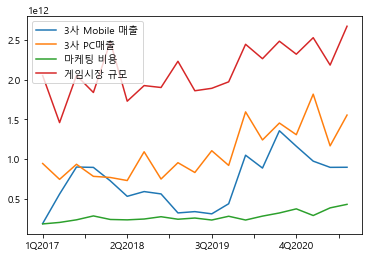

In [7]:
df.plot()

In [7]:
#코로나 시작 분기부터 재설정
df1=df.loc["1Q2020":, :]
df1

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모
1Q2020,1.048860e+12,1.593336e+12,2.347716e+11,2.442203e+12
2Q2020,8.875083e+11,1.240709e+12,2.838224e+11,2.261376e+12
3Q2020,1.356090e+12,1.453089e+12,3.233597e+11,2.481031e+12
4Q2020,1.161611e+12,1.306676e+12,3.749360e+11,2.317881e+12
1Q2021,9.742760e+11,1.815808e+12,2.914224e+11,2.525152e+12
2Q2021,8.964657e+11,1.166518e+12,3.873891e+11,2.181218e+12
3Q2021,8.974830e+11,1.553097e+12,4.316472e+11,2.669047e+12


<AxesSubplot:>

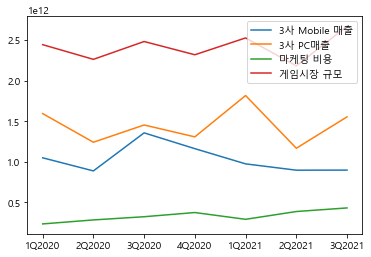

In [11]:
df1.plot()

In [8]:
# 데이터 저장
df1.to_csv("./df1.csv", sep=",", encoding="utf-8")

In [8]:
# 코로나 데이터(경수님 것으로 대체)
corona_pv = pd.read_csv("./corona2.csv", index_col=0)
corona_pv

,일일확진자
1Q2020,9886
2Q2020,2963
3Q2020,11038
4Q2020,37865
1Q2021,41877
2Q2021,54091
3Q2021,153555


In [9]:
corona_pv.rename(columns = {"일일확진자" : "분기별 확진자"}, inplace=True)

In [10]:
corona_pv

,분기별 확진자
1Q2020,9886
2Q2020,2963
3Q2020,11038
4Q2020,37865
1Q2021,41877
2Q2021,54091
3Q2021,153555


In [11]:
# 매출액과 코로나 데이터 합침
final = pd.merge(df1, corona_pv, left_index=True, right_index=True)
final

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모,분기별 확진자
1Q2020,1.048860e+12,1.593336e+12,2.347716e+11,2.442203e+12,9886
2Q2020,8.875083e+11,1.240709e+12,2.838224e+11,2.261376e+12,2963
3Q2020,1.356090e+12,1.453089e+12,3.233597e+11,2.481031e+12,11038
4Q2020,1.161611e+12,1.306676e+12,3.749360e+11,2.317881e+12,37865
1Q2021,9.742760e+11,1.815808e+12,2.914224e+11,2.525152e+12,41877
2Q2021,8.964657e+11,1.166518e+12,3.873891e+11,2.181218e+12,54091
3Q2021,8.974830e+11,1.553097e+12,4.316472e+11,2.669047e+12,153555


### 정규화

In [12]:
from sklearn.preprocessing import MinMaxScaler         

scaler = MinMaxScaler()
scaler.fit(final)
result_scaled = scaler.transform(final)

final_normed = pd.DataFrame(data = result_scaled, columns = final.columns)

print("변수들의 최솟값: \n", final_normed.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", final_normed.max())

# 최솟값과 최댓값의 격차가 줄어들었다.

변수들의 최솟값: 
 3사 Mobile 매출    0.0
3사 PC매출         0.0
마케팅 비용          0.0
게임시장 규모         0.0
분기별 확진자         0.0
dtype: float64
-----------------------------------------------------
변수들의 최댓값: 
 3사 Mobile 매출    1.0
3사 PC매출         1.0
마케팅 비용          1.0
게임시장 규모         1.0
분기별 확진자         1.0
dtype: float64


In [13]:
final_normed

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모,분기별 확진자
0,0.344341,0.657361,0.000000,0.534992,0.045972
1,0.000000,0.114265,0.249146,0.164316,0.000000
2,1.000000,0.441361,0.449970,0.614585,0.053622
3,0.584962,0.215863,0.711944,0.280144,0.231765
4,0.185171,1.000000,0.287749,0.705030,0.258407
5,0.019116,0.000000,0.775198,0.000000,0.339513
6,0.021287,0.595387,1.000000,1.000000,1.000000


In [14]:
final_normed.index=["1Q2020", "2Q2020", "3Q2020", "4Q2020", "1Q2021", "2Q2021", "3Q2021"]

In [15]:
final_normed

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모,분기별 확진자
1Q2020,0.344341,0.657361,0.000000,0.534992,0.045972
2Q2020,0.000000,0.114265,0.249146,0.164316,0.000000
3Q2020,1.000000,0.441361,0.449970,0.614585,0.053622
4Q2020,0.584962,0.215863,0.711944,0.280144,0.231765
1Q2021,0.185171,1.000000,0.287749,0.705030,0.258407
2Q2021,0.019116,0.000000,0.775198,0.000000,0.339513
3Q2021,0.021287,0.595387,1.000000,1.000000,1.000000


In [16]:
# 3사 pc 매출과 관련 있는 것은
print(np.corrcoef(final_normed["3사 PC매출"],final_normed["3사 Mobile 매출"])) 
print(np.corrcoef(final_normed["3사 PC매출"],final_normed["마케팅 비용"])) 
print(np.corrcoef(final_normed["3사 PC매출"],final_normed["게임시장 규모"]))
print(np.corrcoef(final_normed["3사 PC매출"],final_normed["분기별 확진자"]))

[[1.         0.07782212]
 [0.07782212 1.        ]]
[[ 1.         -0.32343634]
 [-0.32343634  1.        ]]
[[1.         0.79849535]
 [0.79849535 1.        ]]
[[1.         0.17210296]
 [0.17210296 1.        ]]


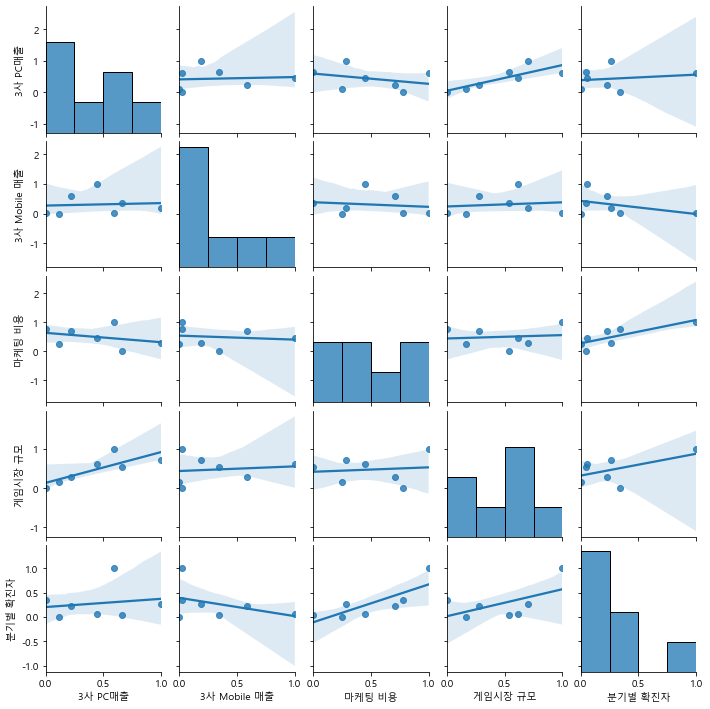

In [17]:
sns.pairplot(final_normed, vars=["3사 PC매출","3사 Mobile 매출","마케팅 비용","게임시장 규모","분기별 확진자"],size=2,kind="reg")

### 코로나 이후 3사 PC와 3사 모바일 매출간의 관계 확인 

[0.08285199 0.27204463]
 
0.08285 x + 0.272


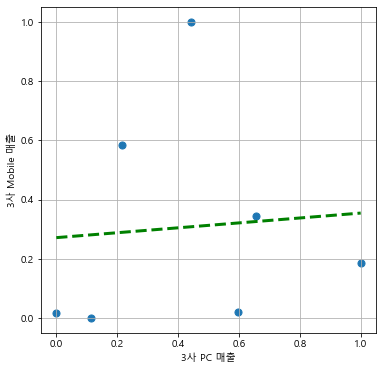

In [18]:
# 기울기와 절편

fp1= np.polyfit(final_normed["3사 PC매출"],final_normed["3사 Mobile 매출"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,1) 

plt.figure(figsize=(6,6))
plt.scatter(final_normed["3사 PC매출"],final_normed["3사 Mobile 매출"] ,s=50) # s는 점크기

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("3사 PC 매출")
plt.ylabel("3사 Mobile 매출")
plt.grid()

### 코로나 이후 3사 PC매출과 마케팅 비용 간의 관계 확인

[-0.32267573  0.63569348]
 
-0.3227 x + 0.6357


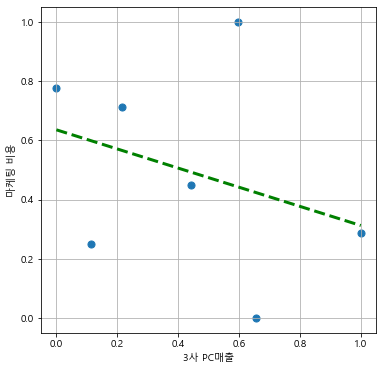

In [51]:
# 기울기와 절편

fp1= np.polyfit(final_normed["3사 PC매출"],final_normed["마케팅 비용"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,1) 

plt.figure(figsize=(6,6))
plt.scatter(final_normed["3사 PC매출"],final_normed["마케팅 비용"] ,s=50) # s는 점크기

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("3사 PC매출")
plt.ylabel("마케팅 비용")
plt.grid()

### 코로나 이후 3사 PC매출과 게임시장 규모간의 상관 관계 확인

[0.78597929 0.13172566]
 
0.786 x + 0.1317


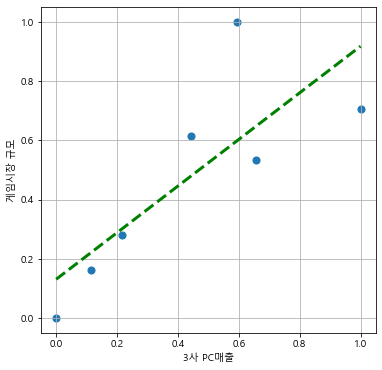

In [52]:
# 기울기와 절편

fp1= np.polyfit(final_normed["3사 PC매출"],final_normed["게임시장 규모"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,1) 

plt.figure(figsize=(6,6))
plt.scatter(final_normed["3사 PC매출"],final_normed["게임시장 규모"] ,s=50) # s는 점크기

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("3사 PC매출")
plt.ylabel("게임시장 규모")
plt.grid()

### 코로나 이후 3사 PC매출과 분기별 확진자 간의 상관관계 확인

[0.16909224 0.20255773]
 
0.1691 x + 0.2026


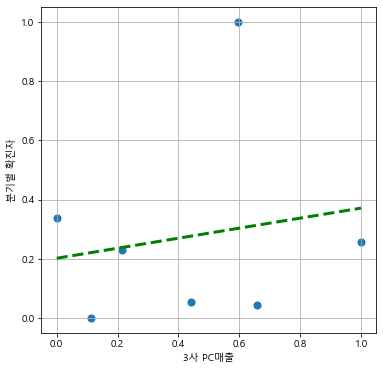

In [53]:
# 기울기와 절편

fp1= np.polyfit(final_normed["3사 PC매출"],final_normed["분기별 확진자"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,1) 

plt.figure(figsize=(6,6))
plt.scatter(final_normed["3사 PC매출"],final_normed["분기별 확진자"] ,s=50) # s는 점크기

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("3사 PC매출")
plt.ylabel("분기별 확진자")
plt.grid()

Text(0.5, 1.0, 'heat map')

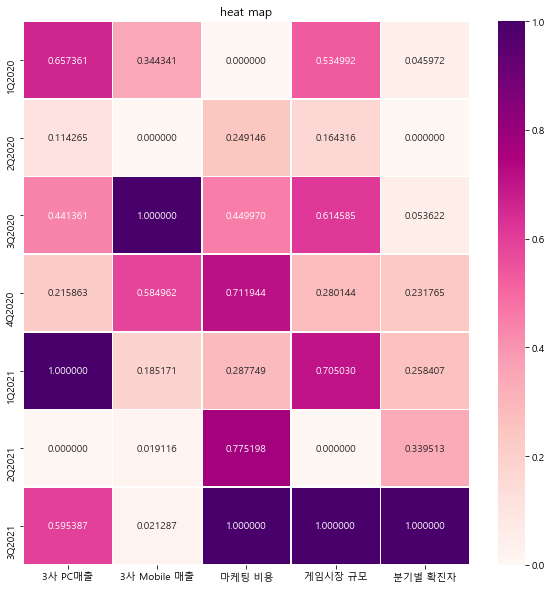

In [54]:
#히트맵 작성
plt.figure(figsize=(10,10))
sns.heatmap(final_normed[["3사 PC매출","3사 Mobile 매출","마케팅 비용","게임시장 규모","분기별 확진자"]],
            cmap="RdPu",annot=True,fmt="f",linewidths=.5)


plt.title("heat map")

<AxesSubplot:title={'center':'Heat Map'}>

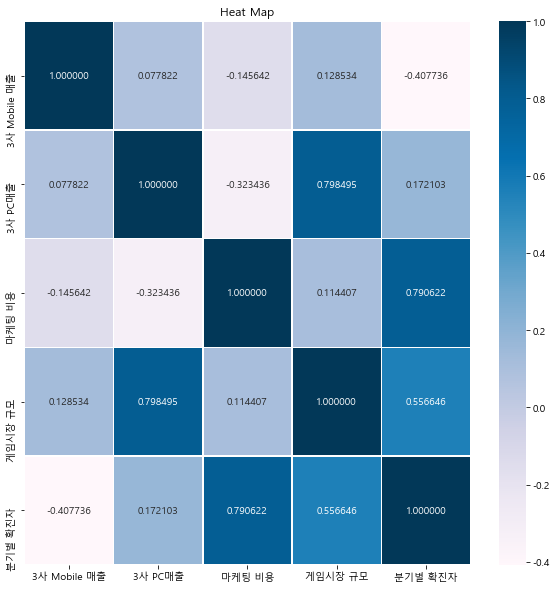

In [55]:
#서로간의 상관관계 확인

plt.figure(figsize=(10,10))
plt.title("Heat Map")
sns.heatmap(final_normed.astype(float).corr(), linewidth=0.5, cmap="PuBu", annot=True, fmt="f")

### 결과

+ 3사 PC매출은 게임시장 규모와 강한 상관관계를 보인다 (0.7 이상)
+ 코로나 이후 3사 PC매출과 마케팅 비용이 음의 상관관계를 가짐
+ 분기별 확진자와 마케팅 비용은 강한 상관관계를 가진다(0.7 이상)

## 회귀분석

In [23]:
final_normed # 정규화 된 데이터프레임

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모,분기별 확진자
1Q2020,0.344341,0.657361,0.000000,0.534992,0.045972
2Q2020,0.000000,0.114265,0.249146,0.164316,0.000000
3Q2020,1.000000,0.441361,0.449970,0.614585,0.053622
4Q2020,0.584962,0.215863,0.711944,0.280144,0.231765
1Q2021,0.185171,1.000000,0.287749,0.705030,0.258407
2Q2021,0.019116,0.000000,0.775198,0.000000,0.339513
3Q2021,0.021287,0.595387,1.000000,1.000000,1.000000


In [24]:
X = final_normed[["3사 Mobile 매출", "마케팅 비용", "게임시장 규모", "분기별 확진자"]]
y = final_normed["3사 PC매출"]

regr = linear_model.LinearRegression()
model = regr.fit(X,y)

print("Intercept :", model.intercept_)
print("Coefficients :", model.coef_)

Intercept : 0.2469877098390591
Coefficients : [-0.12183054 -0.37703451  0.92193737 -0.0901167 ]


코로나 데이터 넣고 summary 해보기

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
final_normed.columns = ["삼사Mobile매출", "삼사PC매출", "마케팅비용","게임시장규모", "분기별확진자"]
final_normed # 한글로 변경

,삼사Mobile매출,삼사PC매출,마케팅비용,게임시장규모,분기별확진자
1Q2020,0.344341,0.657361,0.000000,0.534992,0.045972
2Q2020,0.000000,0.114265,0.249146,0.164316,0.000000
3Q2020,1.000000,0.441361,0.449970,0.614585,0.053622
4Q2020,0.584962,0.215863,0.711944,0.280144,0.231765
1Q2021,0.185171,1.000000,0.287749,0.705030,0.258407
2Q2021,0.019116,0.000000,0.775198,0.000000,0.339513
3Q2021,0.021287,0.595387,1.000000,1.000000,1.000000


In [32]:
model = smf.ols(formula = "삼사PC매출 ~ 삼사Mobile매출 + 마케팅비용 + 게임시장규모 + 분기별확진자", data = final_normed)
result = model.fit()
result.summary() 

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     2.293
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.326
Time:                        15:10:10   Log-Likelihood:                 3.9785
No. Observations:                   7   AIC:                             2.043
Df Residuals:                       2   BIC:                             1.773
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2470      0.498      0.496      0.669      -1.897       2.391
삼사Mobile매출    -0.1218      0.832     -0.146      0.897      -3.700       3.457
마케팅비용         -0.3770      1.522     -0.248      0.827      -6.926       6.172
게임시장규모         0.9219      1.221      0.755      0.529      -4.332       6.176
분기별확진자        -0.0901      2.242     -0.040      0.972      -9.737       9.557
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.203
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.424
Skew:                           0.521   Prob(JB):                        0.809
Kurtosis:                       2.393   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# 모든 변수의 p값이 0.05 이상으로 유의하지 않음
# 모바일 부분 제거

In [34]:
model2 = smf.ols(formula = "삼사PC매출 ~ 마케팅비용 + 게임시장규모 + 분기별확진자", data = final_normed)
result = model2.fit()
result.summary()
# 마케팅비용, 게임시장규모, 분기별확진자

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     4.526
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.123
Time:                        15:14:18   Log-Likelihood:                 3.9411
No. Observations:                   7   AIC:                            0.1177
Df Residuals:                       3   BIC:                          -0.09864
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3026      0.265      1.143      0.336      -0.540       1.145
마케팅비용         -0.5795      0.523     -1.107      0.349      -2.245       1.086
게임시장규모         0.7572      0.391      1.937      0.148      -0.487       2.002
분기별확진자         0.2181      0.636      0.343      0.754      -1.805       2.241
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.170
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.783
Skew:                           0.798   Prob(JB):                        0.676
Kurtosis:                       2.630   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 그래도 똑같다
# 마케팅 비용을 제거

In [39]:
model3 = smf.ols(formula = "삼사PC매출 ~ 삼사Mobile매출 + 게임시장규모 + 분기별확진자", data = final_normed)
result = model3.fit()
result.summary()
# 모바일, 게임시장규모, 분기별확진자

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4.419
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.127
Time:                        15:24:23   Log-Likelihood:                 3.8727
No. Observations:                   7   AIC:                            0.2545
Df Residuals:                       3   BIC:                           0.03818
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1333      0.161      0.828      0.468      -0.379       0.645
삼사Mobile매출    -0.3089      0.289     -1.070      0.363      -1.228       0.610
게임시장규모         1.2065      0.343      3.514      0.039       0.114       2.299
분기별확진자        -0.6341      0.374     -1.697      0.188      -1.823       0.555
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.345
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.224
Skew:                           0.121   Prob(JB):                        0.894
Kurtosis:                       2.157   Cond. No.                         7.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 게임시장규모 제외 아직도 p값이 높음
# 게임시장규모 제거

In [40]:
model4 = smf.ols(formula = "삼사PC매출 ~ 삼사Mobile매출 + 마케팅비용 + 분기별확진자", data = final_normed)
result = model4.fit()
result.summary()
# 모바일, 마케팅비용, 분기별확진자

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3.346
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.174
Time:                        15:25:28   Log-Likelihood:                 3.1009
No. Observations:                   7   AIC:                             1.798
Df Residuals:                       3   BIC:                             1.582
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5887      0.193      3.049      0.055      -0.026       1.203
삼사Mobile매출     0.4563      0.300      1.520      0.226      -0.499       1.412
마케팅비용         -1.4581      0.478     -3.051      0.055      -2.979       0.063
분기별확진자         1.5473      0.526      2.943      0.060      -0.126       3.220
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.378
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.286
Skew:                           1.349   Prob(JB):                        0.319
Kurtosis:                       3.749   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 분기별확진자를 제거

In [42]:
model5 = smf.ols(formula = "삼사PC매출 ~ 삼사Mobile매출 + 게임시장규모 + 마케팅비용", data = final_normed)
result = model5.fit()
result.summary()
# 모바일, 게임시장규모, 마케팅

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     4.581
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.122
Time:                        15:26:10   Log-Likelihood:                 3.9757
No. Observations:                   7   AIC:                           0.04867
Df Residuals:                       3   BIC:                           -0.1677
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2646      0.193      1.368      0.265      -0.351       0.880
삼사Mobile매출    -0.0905      0.235     -0.386      0.726      -0.837       0.656
게임시장규모         0.8745      0.253      3.460      0.041       0.070       1.679
마케팅비용         -0.4370      0.250     -1.748      0.179      -1.232       0.358
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.190
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.496
Skew:                           0.590   Prob(JB):                        0.780
Kurtosis:                       2.446   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

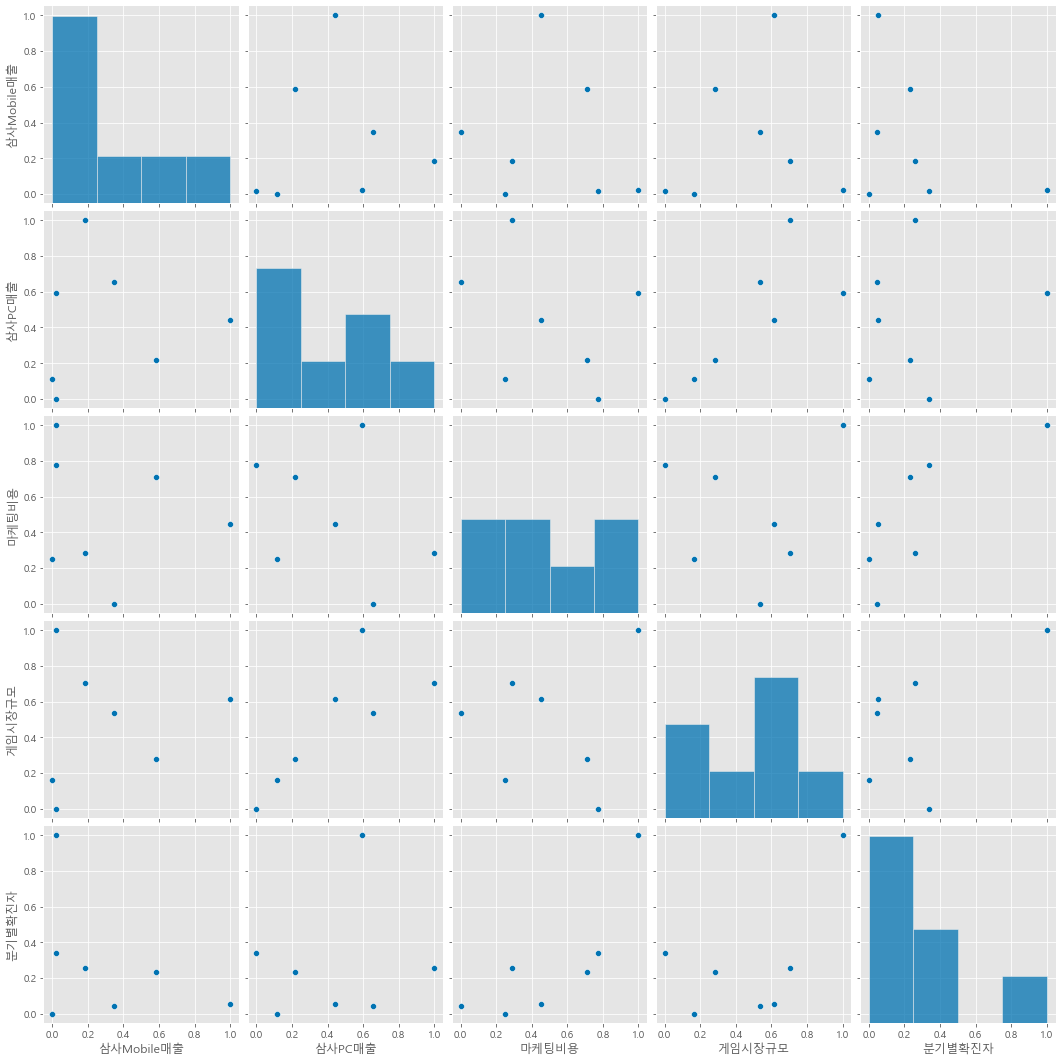

In [45]:
sns.set_palette("colorblind")
sns.pairplot(data = final_normed, height=3)
#경수님과 다르게 계산되었나 그래프 다시 그림

In [50]:
# 상수항 넣고 회귀결과 확인해보기
X = final_normed[['마케팅비용', '게임시장규모', '분기별확진자']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(final_normed['삼사PC매출'], X).fit()
olsmod.summary()
# 마케팅비용, 게임시장규모, 분기별확진자(모바일 제거)

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     4.526
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.123
Time:                        15:38:03   Log-Likelihood:                 3.9411
No. Observations:                   7   AIC:                            0.1177
Df Residuals:                       3   BIC:                          -0.09864
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3026      0.265      1.143      0.336      -0.540       1.145
마케팅비용         -0.5795      0.523     -1.107      0.349      -2.245       1.086
게임시장규모         0.7572      0.391      1.937      0.148      -0.487       2.002
분기별확진자         0.2181      0.636      0.343      0.754      -1.805       2.241
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.170
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.783
Skew:                           0.798   Prob(JB):                        0.676
Kurtosis:                       2.630   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X = final_normed[['삼사Mobile매출', '게임시장규모', '분기별확진자']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(final_normed['삼사PC매출'], X).fit()
olsmod.summary()
# 모바일, 게임시장규모, 분기별확진자(마케팅비용 제거)

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4.419
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.127
Time:                        15:45:05   Log-Likelihood:                 3.8727
No. Observations:                   7   AIC:                            0.2545
Df Residuals:                       3   BIC:                           0.03818
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1333      0.161      0.828      0.468      -0.379       0.645
삼사Mobile매출    -0.3089      0.289     -1.070      0.363      -1.228       0.610
게임시장규모         1.2065      0.343      3.514      0.039       0.114       2.299
분기별확진자        -0.6341      0.374     -1.697      0.188      -1.823       0.555
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.345
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.224
Skew:                           0.121   Prob(JB):                        0.894
Kurtosis:                       2.157   Cond. No.                         7.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X = final_normed[['삼사Mobile매출', '마케팅비용', '분기별확진자']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(final_normed['삼사PC매출'], X).fit()
olsmod.summary()
# 모바일, 마케팅비용, 분기별확진자(게임시장 규모 제거)

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3.346
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.174
Time:                        15:45:25   Log-Likelihood:                 3.1009
No. Observations:                   7   AIC:                             1.798
Df Residuals:                       3   BIC:                             1.582
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5887      0.193      3.049      0.055      -0.026       1.203
삼사Mobile매출     0.4563      0.300      1.520      0.226      -0.499       1.412
마케팅비용         -1.4581      0.478     -3.051      0.055      -2.979       0.063
분기별확진자         1.5473      0.526      2.943      0.060      -0.126       3.220
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.378
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.286
Skew:                           1.349   Prob(JB):                        0.319
Kurtosis:                       3.749   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X = final_normed[['삼사Mobile매출', '게임시장규모', '마케팅비용']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(final_normed['삼사PC매출'], X).fit()
olsmod.summary()
# 모바일, 게임시장 규모, 마케팅 비용 (확진자 제거)

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     4.581
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.122
Time:                        15:48:16   Log-Likelihood:                 3.9757
No. Observations:                   7   AIC:                           0.04867
Df Residuals:                       3   BIC:                           -0.1677
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2646      0.193      1.368      0.265      -0.351       0.880
삼사Mobile매출    -0.0905      0.235     -0.386      0.726      -0.837       0.656
게임시장규모         0.8745      0.253      3.460      0.041       0.070       1.679
마케팅비용         -0.4370      0.250     -1.748      0.179      -1.232       0.358
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.190
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.496
Skew:                           0.590   Prob(JB):                        0.780
Kurtosis:                       2.446   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# p값이 0.05 이하 되는 게 없다....